# SkillCorner Open Data + kloppy

## Corner Kick Quest App
#### by Ana De Souza

As mentioned in the notebook "Exploratory Data Analysis" notebook, we will visualize the frame and the quest to find a corner kick.

#### **Importing Libraries**

In [1]:
#pip install kloppy 

In [2]:
#pip install mplsoccer

In [3]:
from kloppy import skillcorner
from mplsoccer.pitch import Pitch
import pandas as pd
import matplotlib.pyplot as plt
import panel as pn

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

#### **Loading the Dataset**

In [4]:
dataset = skillcorner.load_open_data(
    match_id=2068,
    sample_rate=1/10,
    limit=100,
    coordinates="skillcorner",
    include_empty_frames=False
)

df = dataset.to_pandas()

/var/folders/jy/6vkdbscx6wl2sl46c29t4l1h0000gn/T/ipykernel_54117/815353277.py:9: DeprecationWarning: Call to deprecated function to_pandas (to_pandas will be removed in the future. Please use to_df instead.).
  df = dataset.to_pandas()


#### **Converting timestamps in mm:ss format**

In [5]:
def convert_to_mmss(seconds):
    minutes = int(seconds // 60)
    remaining_seconds = int(seconds % 60)
    return '{:02d}:{:02d}'.format(minutes, remaining_seconds)

df['timestamp'] = df['timestamp'].apply(convert_to_mmss)

In [6]:
warnings.filterwarnings("ignore", message="posx and posy should be finite values")

warnings.filterwarnings("ignore", message=".*GET /favicon.ico .*")

#### **Creating an app to see frame by frame**

Launching server at http://localhost:50555


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

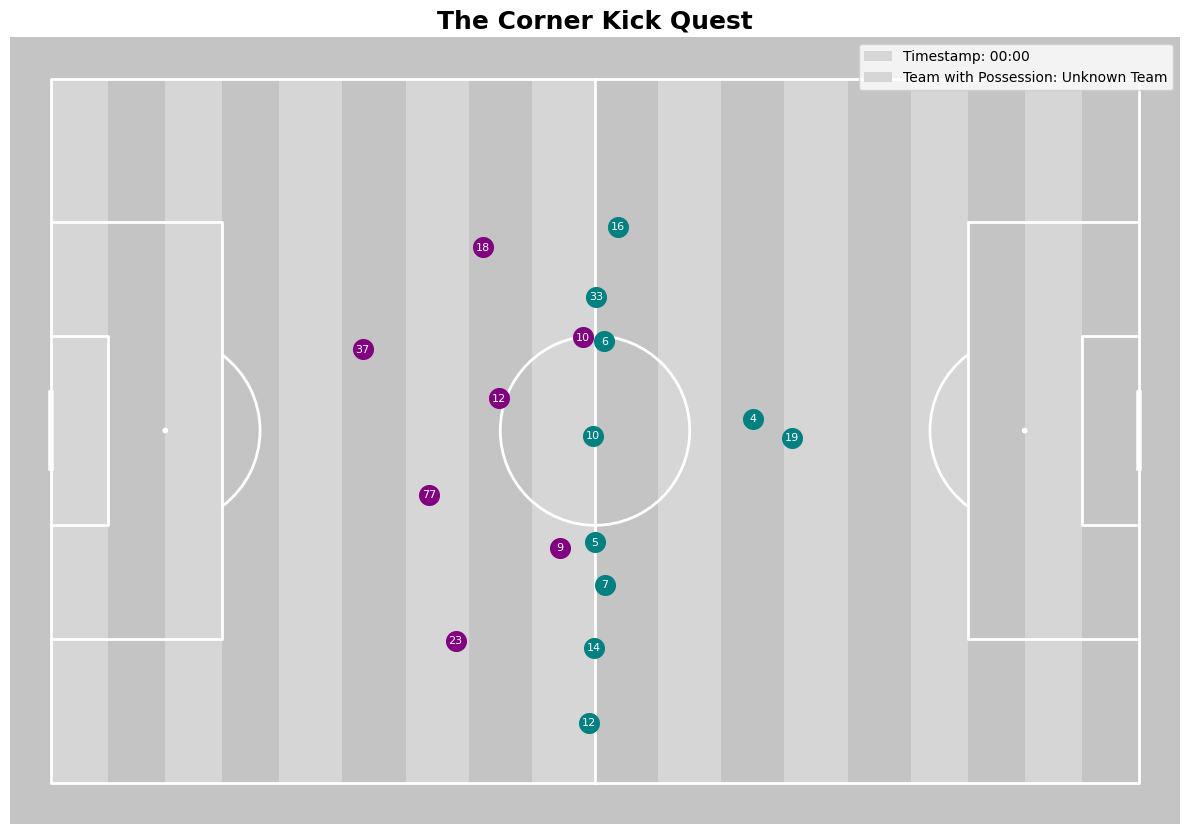

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

In [7]:
def visualize_data(index):
    
    # Pitch
    pitch = Pitch(pitch_type='skillcorner', pitch_color='#c4c4c4', line_color='white',
                  stripe_color='#d6d6d6', stripe=True, pitch_length=105, pitch_width=68)

    fig, ax = pitch.draw(figsize=(12, 10))

    # Ball
    x = df.loc[index]['ball_x']
    y = df.loc[index]['ball_y']
    ax.scatter(x, y, color='blue', edgecolor='black')

    # Players
    coordinates = {
        'home': [1, 2, 6, 9, 10, 12, 18, 23, 33, 37, 77],
        'away': [1, 4, 5, 6, 7, 10, 12, 14, 16, 19, 33],
        'home_anon': [120, 136, 254, 253, 315, 306, 322, 327],
        'away_anon': [80, 156, 246, 257, 269, 288, 311, 322]
    }

    # Colors
    colors = {
        'home': 'purple',
        'away': 'teal',
        'home_anon': 'orchid',
        'away_anon': 'darkturquoise'
    }

    for team, nums in coordinates.items():
        for num in nums:
            x = df.loc[index][f'{team}_{num}_x']
            y = df.loc[index][f'{team}_{num}_y']
            ax.scatter(x, y, color=colors[team], s=200)
            ax.text(x, y, str(num), color='white', fontsize=8, ha='center', va='center')

    timestamp = df.loc[index]['timestamp']
   
    ball_owning_team_id = df.loc[index]['ball_owning_team_id']
    if ball_owning_team_id == 145:
        team_label = 'Home Team (Purple)'
    elif ball_owning_team_id == 139:
        team_label = 'Away Team (Teal)'
    else:
        team_label = 'Unknown Team'

    ax.legend(['Timestamp: ' + str(timestamp), 'Team with Possession: ' + team_label])

    ax.set_title('The Corner Kick Quest', fontsize=18, fontweight='bold')

    return pn.pane.Matplotlib(fig)

# Define the arrow button callback functions
def next_frame(event):
    if index.value < 100:
        index.value += 1

def previous_frame(event):
    if index.value > -1:
        index.value -= 1

# Index widget/slider
index = pn.widgets.IntSlider(name='Frame', start=0, end=99, value=0)

# Arrow buttons
next_button = pn.widgets.Button(name='Next', button_type='success', width=60, button_style='success')
previous_button = pn.widgets.Button(name='Previous', button_type='warning', width=60, button_style='warning')

# Callback functions for arrow buttons
next_button.on_click(next_frame)
previous_button.on_click(previous_frame)

interactive_viz = pn.interact(visualize_data, index=index)
layout = pn.Row(previous_button, next_button, interactive_viz)

layout.show()